## Load libraries

In [3]:
import pandas as pd
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import numpy as np
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [118]:
booking_ids=[13,               
154618822837, 
223338299461,     
395136991308,     
403726925929,     
455266533495,     
481036337234,     
515396075694,     
695784702084,     
919123001348,     
970662608932,     
1279900254294,    
1348619731077,    
1391569403991,    
1408749273124,    
1511828488211,    
1632087572573,    
1649267441751]

In [119]:
label = pd.read_csv('labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv', index_col=None, header=0)

In [120]:
label.drop(label[label.bookingID.isin(booking_ids)].index, inplace=True)

(array([14999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  4983.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <a list of 16 Patch objects>)

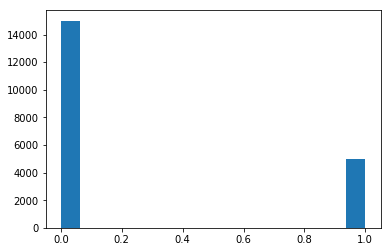

In [121]:
plt.hist(label['label'], bins='auto')

## Load data

In [122]:
features = 'features' 
all_files = glob.glob(features + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

features_frame = pd.concat(li, axis=0, ignore_index=True)


In [123]:
features_frame

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1520418422970,10.000,66.600891,0.903348,-9.662726,-3.650476,0.017363,0.049947,-0.007030,1221.0,25.750000
1,1047972020340,14.000,115.000000,-0.389816,8.700424,-0.613846,0.020203,-0.003387,-0.014130,9.0,10.932214
2,1666447310862,4.000,74.000000,-6.873963,0.852362,5.657671,-0.036326,0.046797,0.001703,675.0,25.159718
3,420906795122,3.663,261.000000,-0.099359,9.641450,0.871489,-0.001222,0.003665,-0.006109,21.0,2.980912
4,927712936057,10.000,49.842670,0.441730,-8.066278,-5.572314,-0.010548,0.020062,-0.022288,62.0,3.130000
5,678604832873,6.000,195.157303,-0.040973,-9.792224,0.932956,0.002311,0.001504,0.005455,586.0,0.164991
6,1228360646715,8.000,249.531128,-0.340494,-9.417935,-2.620471,-0.003347,-0.007777,-0.012312,707.0,7.700432
7,377957122094,3.000,0.000000,-0.544681,8.549694,4.067749,0.001332,0.004826,-0.002419,385.0,0.000000
8,1030792151060,3.900,216.000000,-1.556279,8.296163,-1.939363,-0.104352,0.284310,0.030496,604.0,11.285507
9,292057776176,3.000,271.000000,1.227000,10.780000,3.460000,-0.032991,0.001222,0.020772,106.0,0.000000


In [124]:
features_frame=features_frame[features_frame.bookingID.isin(label.bookingID)]

In [125]:
len(features_frame.bookingID.unique())

19982

In [126]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True).groupby('bookingID')

In [127]:
features_frame['accel'] =features_frame_group['Speed'].diff()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
features_frame['accel'] = features_frame['accel'].fillna(0)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
features_frame['bearing_vel'] =features_frame_group['Bearing'].diff()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
features_frame['bearing_vel'] = features_frame['bearing_vel'].fillna(0)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
features_frame

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,accel,bearing_vel
0,1520418422970,10.000,66.600891,0.903348,-9.662726,-3.650476,0.017363,0.049947,-0.007030,1221.0,25.750000,0.059999,0.000000
1,1047972020340,14.000,115.000000,-0.389816,8.700424,-0.613846,0.020203,-0.003387,-0.014130,9.0,10.932214,0.372043,-5.000000
2,1666447310862,4.000,74.000000,-6.873963,0.852362,5.657671,-0.036326,0.046797,0.001703,675.0,25.159718,-0.005042,0.000000
3,420906795122,3.663,261.000000,-0.099359,9.641450,0.871489,-0.001222,0.003665,-0.006109,21.0,2.980912,-1.335953,0.000000
4,927712936057,10.000,49.842670,0.441730,-8.066278,-5.572314,-0.010548,0.020062,-0.022288,62.0,3.130000,2.240000,2.073311
5,678604832873,6.000,195.157303,-0.040973,-9.792224,0.932956,0.002311,0.001504,0.005455,586.0,0.164991,0.000000,0.000000
6,1228360646715,8.000,249.531128,-0.340494,-9.417935,-2.620471,-0.003347,-0.007777,-0.012312,707.0,7.700432,0.000000,0.000000
7,377957122094,3.000,0.000000,-0.544681,8.549694,4.067749,0.001332,0.004826,-0.002419,385.0,0.000000,0.000000,0.000000
8,1030792151060,3.900,216.000000,-1.556279,8.296163,-1.939363,-0.104352,0.284310,0.030496,604.0,11.285507,0.038242,0.000000
9,292057776176,3.000,271.000000,1.227000,10.780000,3.460000,-0.032991,0.001222,0.020772,106.0,0.000000,0.000000,0.000000


In [132]:
y = label.sort_values(['bookingID'],ascending=True)

In [133]:
y = y['label']

In [134]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True)\
.groupby('bookingID')\
.agg(['min', 'max','mean','median','std','var','sum'])


In [135]:
features_frame_group.columns = ["_".join(x) for x in features_frame_group.columns.ravel()]

In [136]:
featute_names=list(features_frame_group.columns)

In [137]:
features_frame_group.head

<bound method NDFrame.head of                Accuracy_min  Accuracy_max  Accuracy_mean  Accuracy_median  \
bookingID                                                                   
0                     4.000        48.000      10.165339           8.0000   
1                     3.000         7.709       3.718763           3.9000   
2                     3.000         8.000       3.930626           3.6340   
4                    10.000        10.000      10.000000          10.0000   
6                     3.000        12.000       4.586721           4.0040   
7                     3.000         3.900       3.681034           3.9000   
8                     3.000        18.204       7.008253           6.0680   
10                    3.000         9.000       3.815000           3.9000   
11                    3.000         8.000       4.222360           3.9000   
14                   16.000        54.000      20.283333          16.0000   
16                    3.000         8.452     

In [138]:
X = features_frame_group.values

In [139]:
len(X[0])==len(featute_names)

True

In [140]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=42)

## Create Dataset object for LightGBM

In [141]:
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature='auto')
lgb_test = lgb.Dataset(X_valid, y_valid, reference=lgb_train,categorical_feature='auto')

## Configuration dictionary

In [148]:
params = {
    'boosting_type' : 'gbdt',
    'objective':'binary',
    'metric': ['binary_logloss','auc'],
    'num_trees':1000,
    'learning_rate' :0.1
}

## Training

In [149]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
               
                valid_sets=[lgb_train, lgb_test],
                feature_name=featute_names,
               
                evals_result=evals_result,
                verbose_eval=10,
               early_stopping_rounds=30)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.779266	training's binary_logloss: 0.480769	valid_1's auc: 0.730042	valid_1's binary_logloss: 0.501822
[20]	training's auc: 0.80779	training's binary_logloss: 0.450854	valid_1's auc: 0.736444	valid_1's binary_logloss: 0.488063
[30]	training's auc: 0.83087	training's binary_logloss: 0.430771	valid_1's auc: 0.738732	valid_1's binary_logloss: 0.484393
[40]	training's auc: 0.852782	training's binary_logloss: 0.414367	valid_1's auc: 0.740246	valid_1's binary_logloss: 0.482922
[50]	training's auc: 0.871465	training's binary_logloss: 0.399914	valid_1's auc: 0.738292	valid_1's binary_logloss: 0.483288
[60]	training's auc: 0.889872	training's binary_logloss: 0.386356	valid_1's auc: 0.735287	valid_1's binary_logloss: 0.484292
Early stopping, best iteration is:
[38]	training's auc: 0.848049	training's binary_logloss: 0.417508	valid_1's auc: 0.74051	valid_1's binary_logloss: 0.482976


## Plot metrics recorded during training

In [150]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [151]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'][0])
else:
    render_metric(params['metric'][0])

interactive(children=(Text(value='binary_logloss', description='metric_name'), Output()), _dom_classes=('widge…

## Plot feature importances

In [152]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=4):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [153]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…

## Plot split value histogram

In [154]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()

In [155]:
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram,
             feature=gbm.feature_name())
else:
    render_histogram(feature='f26')

interactive(children=(Dropdown(description='feature', options=('Accuracy_min', 'Accuracy_max', 'Accuracy_mean'…

## Plot trees

In [158]:
def render_tree(tree_index, show_info, precision=4):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

In [159]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'leaf_count'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(84, ['None'])
tree

interactive(children=(IntSlider(value=18, description='tree_index', max=37), SelectMultiple(description='show_…